# Interpretability of Multi-Output Classifier(Foodtruck Dataset)

In [1]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn import metrics

# to avoid future warnings for sklearn
import warnings
warnings.filterwarnings("ignore")

## Import the dataset

In [2]:
# Read the CSV file
dataset = pd.read_csv('foodtruck.csv')
print("Dataset.shape: " + str(dataset.shape))

# split the features-X and class labels-y
X = dataset.iloc[:, :-12]
y = dataset.iloc[:, -12:]

print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (407, 33)
X.shape: (407, 21)


frequency  time  expenses  motivation  taste  hygiene  menu  presentation  \
0          2     1        30           1      5        4     4             3   
1          0     1        20           2      5        2     4             4   
2          1     2        15           2      5        2     2             5   
3          0     3        40           1      5        5     4             3   
4          0     1        15           4      5        4     2             3   

   attendance  ingredients  ...  takeaway  variation  stop.strucks  schedule  \
0           4            4  ...         3          3             2         2   
1           4            4  ...         2          3             1         4   
2           3            5  ...         2          2             2         1   
3           4            4  ...         4          5             1         1   
4           4            4  ...         3          4             1         1   

   gender  age.group  scholarity  average.income  has.work  marital.status  
0       1          2         1.5               4         0               1  
1       0          3         2.0               5         1               0  
2       1          2         1.5               4         1               1  
3       1          3         2.0               6         1               1  
4       1          2         1.5               4         1               1  

[5 rows x 21 columns]

y.shape: (407, 12)


street_food  gourmet  italian_food  brazilian_food  mexican_food  \
0            1        0             0               0             0   
1            1        0             1               0             1   
2            1        0             0               1             0   
3            0        1             0               0             0   
4            1        0             0               0             0   

   chinese_food  japanese_food  arabic_food  snacks  healthy_food  \
0             0              0            0       0             0   
1             0              0            0       0             0   
2             0              0            0       0             0   
3             0              0            0       0             0   
4             0              0            0       0             0   

   fitness_food  sweets_desserts  
0             0                1  
1             0                1  
2             0                0  
3             0                0  
4             0                0

Descriptive stats:


frequency        time    expenses  motivation       taste     hygiene  \
count  407.000000  407.000000  407.000000  407.000000  407.000000  407.000000   
mean     0.761671    1.918919   21.486486    2.469287    4.771499    4.651106   
std      0.987461    1.423176    7.247503    1.314345    0.595032    0.699150   
min      0.000000    1.000000   15.000000    1.000000    1.000000    1.000000   
25%      0.000000    1.000000   15.000000    1.000000    5.000000    4.000000   
50%      0.000000    1.000000   20.000000    2.000000    5.000000    5.000000   
75%      1.000000    2.000000   20.000000    4.000000    5.000000    5.000000   
max      4.000000    5.000000   50.000000    5.000000    5.000000    5.000000   

             menu  presentation  attendance  ingredients  ...    takeaway  \
count  407.000000    407.000000  407.000000   407.000000  ...  407.000000   
mean     3.773956      4.272727    4.535627     4.481572  ...    2.732187   
std      1.097696      0.877647    0.724711     0.799649  ...    0.982367   
min      1.000000      1.000000    1.000000     1.000000  ...    1.000000   
25%      3.000000      4.000000    4.000000     4.000000  ...    2.000000   
50%      4.000000      4.000000    5.000000     5.000000  ...    3.000000   
75%      5.000000      5.000000    5.000000     5.000000  ...    3.000000   
max      5.000000      5.000000    5.000000     5.000000  ...    5.000000   

        variation  stop.strucks    schedule      gender   age.group  \
count  407.000000    407.000000  407.000000  407.000000  407.000000   
mean     3.420147      2.690418    2.663391    0.481572    2.358722   
std      1.070374      1.283653    1.356325    0.500275    1.412145   
min      1.000000      1.000000    1.000000    0.000000    1.000000   
25%      3.000000      2.000000    1.000000    0.000000    2.000000   
50%      4.000000      3.000000    3.000000    0.000000    2.000000   
75%      4.000000      4.000000    4.000000    1.000000    3.000000   
max      5.000000      5.000000    5.000000    1.000000    8.000000   

       scholarity  average.income    has.work  marital.status  
count  407.000000      407.000000  407.000000      407.000000  
mean     1.640049        2.958231    0.511057        0.867322  
std      0.907029        1.569640    0.500493        0.367509  
min      0.000000        1.000000    0.000000        0.000000  
25%      1.000000        2.000000    0.000000        1.000000  
50%      1.500000        3.000000    1.000000        1.000000  
75%      2.000000        4.000000    1.000000        1.000000  
max      5.000000        6.000000    1.000000        2.000000  

[8 rows x 21 columns]

### Check the shape of data

In [3]:
# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (284, 21)
X_test.shape: (123, 21)
y_train.shape: (284, 12)
y_test.shape: (123, 12)


### Import Multi-Output Classifier

In [4]:
from sklearn.multioutput import MultiOutputClassifier

### Fit the classifier(with RandomForestClassifier)

In [5]:
MO_classifier = MultiOutputClassifier(RandomForestClassifier(criterion='entropy'), n_jobs=-1)
MO_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(criterion='entropy'),
                      n_jobs=-1)

### Prediction

In [6]:
MO_pred = MO_classifier.predict(X_test)
print(type(MO_pred))

<class 'numpy.ndarray'>


In [7]:
#Get values of prediction
MO_pred_df=pd.DataFrame(MO_pred, columns=y.columns.tolist())
MO_pred_df

street_food  gourmet  italian_food  brazilian_food  mexican_food  \
0              1        1             0               0             0   
1              1        0             0               0             0   
2              1        0             0               0             0   
3              1        0             0               0             0   
4              1        0             0               0             0   
..           ...      ...           ...             ...           ...   
118            1        1             0               0             0   
119            1        0             0               0             0   
120            0        0             0               0             0   
121            1        0             0               0             0   
122            1        0             0               0             0   

     chinese_food  japanese_food  arabic_food  snacks  healthy_food  \
0               0              0            0       0             0   
1               0              0            0       0             0   
2               0              0            0       0             0   
3               0              0            0       0             0   
4               0              0            0       0             0   
..            ...            ...          ...     ...           ...   
118             0              0            0       0             0   
119             0              0            0       0             0   
120             0              0            0       0             0   
121             0              0            0       0             0   
122             0              0            0       0             0   

     fitness_food  sweets_desserts  
0               0                1  
1               0                1  
2               0                1  
3               0                1  
4               0                0  
..            ...              ...  
118             0                1  
119             0                0  
120             0                0  
121             0                1  
122             0                0  

[123 rows x 12 columns]

### predict_proba function

In [8]:
MO_pred_proba=MO_classifier.predict_proba(X_test)
print(type(MO_pred_proba))

<class 'list'>


In [9]:
print(MO_pred_proba)

[array([[0.2 , 0.8 ],
       [0.23, 0.77],
       [0.2 , 0.8 ],
       [0.15, 0.85],
       [0.29, 0.71],
       [0.19, 0.81],
       [0.36, 0.64],
       [0.29, 0.71],
       [0.14, 0.86],
       [0.18, 0.82],
       [0.12, 0.88],
       [0.11, 0.89],
       [0.23, 0.77],
       [0.22, 0.78],
       [0.34, 0.66],
       [0.23, 0.77],
       [0.21, 0.79],
       [0.15, 0.85],
       [0.15, 0.85],
       [0.22, 0.78],
       [0.03, 0.97],
       [0.33, 0.67],
       [0.39, 0.61],
       [0.14, 0.86],
       [0.25, 0.75],
       [0.27, 0.73],
       [0.33, 0.67],
       [0.21, 0.79],
       [0.32, 0.68],
       [0.24, 0.76],
       [0.22, 0.78],
       [0.49, 0.51],
       [0.26, 0.74],
       [0.37, 0.63],
       [0.39, 0.61],
       [0.26, 0.74],
       [0.32, 0.68],
       [0.23, 0.77],
       [0.31, 0.69],
       [0.12, 0.88],
       [0.4 , 0.6 ],
       [0.71, 0.29],
       [0.33, 0.67],
       [0.17, 0.83],
       [0.12, 0.88],
       [0.15, 0.85],
       [0.21, 0.79],
       [0.25

### Calculate multioutput precision and loss

In [10]:
# calculate multioutput precision and loss
from sklearn.metrics import label_ranking_average_precision_score, label_ranking_loss

avg_precision = label_ranking_average_precision_score(y_test, MO_pred)
loss = label_ranking_loss(y_test, MO_pred)

print('Average precision {0:.5f} and loss {1:.5f}'.format(avg_precision, loss))

Average precision 0.57781 and loss 0.48687


## Explain the model with SHAP

### Import SHAP

In [11]:
# Load ML Interpreting Models
import shap

# Initialize JS For Plot
shap.initjs()

### SHAP does not support predict_proba function of this classifier.

In [12]:
explainer_MO = shap.KernelExplainer(MO_classifier.predict_proba,X_train)

AttributeError: 'list' object has no attribute 'shape'

### So we explain the predict function of this classifier.

In [13]:
explainer_MO = shap.KernelExplainer(MO_classifier.predict,X_train)

Using 284 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


## Local Interpretability

### Calculate SHAP values of Sample 1

In [14]:
shap_values = explainer_MO.shap_values(X_test.iloc[0,:])

#### Visualize the shap value, here is the explanation of X_test.iloc[0,:] about the first label "street_food"

In [15]:
shap.force_plot(explainer_MO.expected_value[0], shap_values[0], X_test.iloc[0,:])

#### Explanation of Sample 1 for the second label "gourmet"

In [16]:
shap.force_plot(explainer_MO.expected_value[1], shap_values[1], X_test.iloc[0,:])

#### Explanation of Sample 1 for the last label "sweets_desserts"

In [17]:
shap.force_plot(explainer_MO.expected_value[11], shap_values[11], X_test.iloc[0,:])

### Calculate SHAP values of Sample 2

In [19]:
shap_values = explainer_MO.shap_values(X_test.iloc[1,:])

#### Explanation of Sample 2 for the first label "street_food"

In [20]:
shap.force_plot(explainer_MO.expected_value[0], shap_values[0], X_test.iloc[1,:])

#### Explanation of Sample 2 for the second label "gourmet"

In [21]:
shap.force_plot(explainer_MO.expected_value[1], shap_values[1], X_test.iloc[1,:])

#### Explanation of Sample 2 for the last label "sweets_desserts"

In [22]:
shap.force_plot(explainer_MO.expected_value[11], shap_values[11], X_test.iloc[1,:])

#### Explanation of any Sample (location is X_test.iloc[x,:]) for n-th label

In [23]:
#shap_values = explainer_BR.shap_values(X_test.iloc[n-1,:])
#shap.force_plot(explainer_BR.expected_value[n-1], shap_values[n-1], X_test.iloc[x,:])

## Global Interpretability of predict_proba function

To get the integral outlook of all samples, we use the K-Means Algorithm to summarize the data otherwise it wil take too much time (a few hours)to complete all the calculation. But on the other hand we will lose some accuracy.

In [24]:
# using kmeans
X_train_summary = shap.kmeans(X_train, 10)

### Build the explainer

In [25]:
explainer_MO = shap.KernelExplainer(MO_classifier.predict, X_train_summary)

### Get the KNN_SHAP_values of X_test

In [26]:
shap_values_KNN_test = explainer_MO.shap_values(X_test)

### Summerize the explanations of predictions about Label "street_food"

In [27]:
shap.force_plot(explainer_MO.expected_value[0], shap_values_KNN_test[0], X_test)

### Summerize the explanations of predictions about label "gourmet"

In [28]:
shap.force_plot(explainer_MO.expected_value[1], shap_values_KNN_test[1], X_test)

### Summerize the explanations of predictions about label "sweets_desserts"

In [29]:
shap.force_plot(explainer_MO.expected_value[11], shap_values_KNN_test[11], X_test)

### Summerize the explanations of predictions about label "snacks"

In [30]:
shap.force_plot(explainer_MO.expected_value[8], shap_values_KNN_test[8], X_test)

### Summerize the explanations of predictions about the n-th Label

In [31]:
#shap.force_plot(explainer_BR.expected_value[n-1], shap_values_KNN_test[n-1], X_test)

## Bar chart of feature Importance

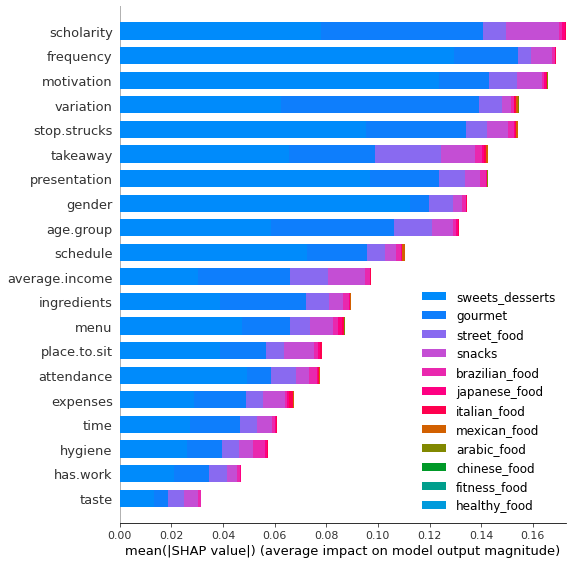

In [32]:
shap.summary_plot(shap_values_KNN_test, X, plot_type="bar",class_names = y.columns.tolist())

### Summarize the impact of all features over the entire dataset

It is obvious that this explainer lose much accuracy because the labels "healthy_food","fitness_food" etc. can hardly be seen.
From the bar chart we can know how the predictions of labels are most influenced by the specific features. 
For example, the feature "gender" has the most influences on the prediction about labels "sweets_desserts. 
The feature "takeaway" has the most influences on the prediction about label "street_food".

### summary_plot shows us how each feature impacts the labels.

#### How each feature impacts label "sweets_desserts".

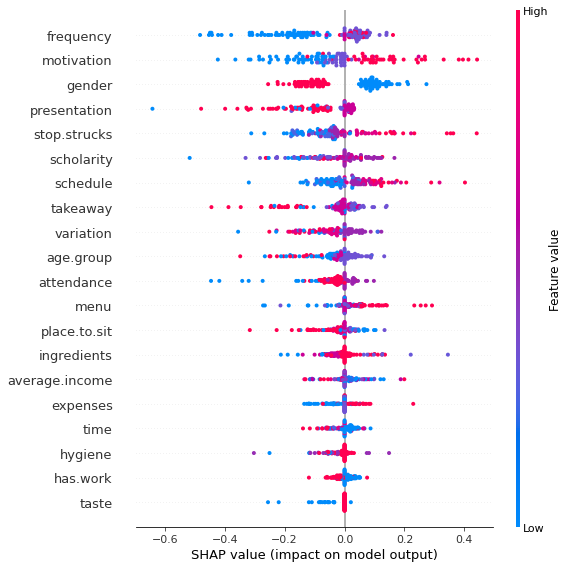

In [38]:
shap.summary_plot(shap_values_KNN_test[11], X_test)

#### How each feature impacts label "street_food".

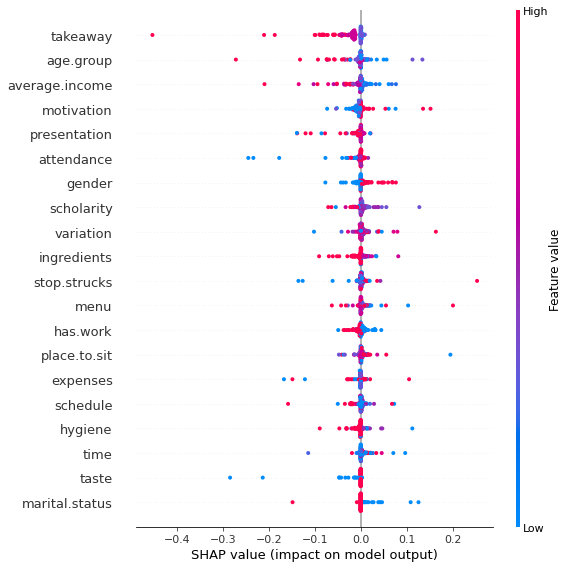

In [39]:
shap.summary_plot(shap_values_KNN_test[0], X_test)

### Examine how changes in a feature change the model's prediction

### We use dependence_plot.

### Feature "gender" on label "sweets_desserts"

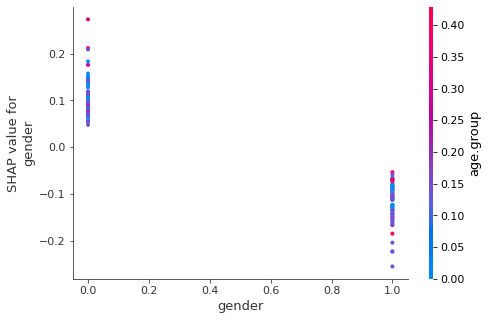

In [40]:
shap.dependence_plot("gender", shap_values_KNN_test[11], X_test)

### Feature "takeaway" on label "street_food"

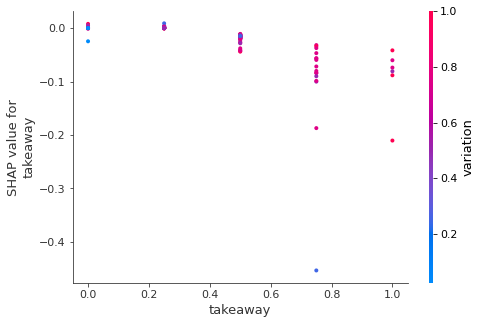

In [41]:
shap.dependence_plot("takeaway", shap_values_KNN_test[0], X_test)

## Explain with LIME

### Import LIME

In [42]:
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [43]:
# Creating the Lime Explainer
# Be very careful in setting the order of the class names
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="lasso_path",
    class_names=["street_food","gourmet","italian_food","brazilian_food","mexican_food","chinese_food","japanese_food","arabic_food","snacks","healthy_food","fitness_food","sweets_desserts"],
    discretize_continuous=True,
    discretizer="entropy",
)

### LIME dose not support predict_proba function of this classifier.

In [44]:
row=1
exp = lime_explainer.explain_instance(X_test.iloc[row], MO_classifier.predict_proba, num_features=20)
exp.show_in_notebook(show_table=True)

AttributeError: 'list' object has no attribute 'shape'

### So we try predict function.

In [45]:
row=1
exp = lime_explainer.explain_instance(X_test.iloc[row], MO_classifier.predict, num_features=20)
exp.show_in_notebook(show_table=True)

In [46]:
row=2
exp = lime_explainer.explain_instance(X_test.iloc[row], MO_classifier.predict, num_features=20)
exp.show_in_notebook(show_table=True)

In [47]:
row=100
exp = lime_explainer.explain_instance(X_test.iloc[row], MO_classifier.predict, num_features=20)
exp.show_in_notebook(show_table=True)

## Explain with eli5(Permutation Feature Importance)

In [48]:
import eli5
from eli5.sklearn import PermutationImportance

In [49]:
perms_MO = PermutationImportance(MO_classifier).fit(X_test, y_test)

In [50]:
eli5.show_weights(perms_MO,top=21,feature_names = X.columns.tolist())